In [32]:

# multivariate output multi-step 1d cnn example
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from keras.layers import Input, TimeDistributed, Conv2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Reshape,GRU, LeakyReLU, Reshape,Permute,ConvLSTM2D,ConvLSTM1D,Conv1D	,UpSampling2D,Conv2DTranspose,ZeroPadding2D,UpSampling1D,Cropping1D,Lambda,LSTM,RepeatVector
from keras.models import Model
import matplotlib.pyplot as plt

In [33]:
import pandas as pd

In [34]:
data = pd.read_excel('data.xlsx', sheet_name="Edirne", index_col=0)
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2004,321,34238.1200,11720.9000,1657.7500,12.6,9.5,5.4,0.6,-1.4,-0.1,...,24.5,105.7,8.7,49.4,61.2,9.4,34.1,14.6,59.6,95.2
2005,352,34354.3700,13176.9100,1799.5000,14.3,11.0,5.2,1.8,0.6,-0.1,...,0.5,5.2,27.8,107.1,84.3,144.7,29.7,17.6,55.4,15.1
2006,325,38679.3100,11741.4800,1792.0400,14.6,8.7,4.3,1.2,-3.1,-1.0,...,49.5,56.3,90.2,89.3,56.4,55.7,122.8,24.0,36.5,87.8
2007,420,36766.8830,11237.4575,1776.6725,14.4,10.9,4.0,0.5,2.5,2.0,...,86.0,54.9,25.8,32.9,92.4,36.6,41.6,17.0,122.0,8.2
2008,422,37477.8375,7827.3880,1717.1210,13.4,10.5,4.3,-0.2,-1.5,-0.2,...,45.7,40.5,147.1,85.0,32.4,2.8,31.3,45.9,33.4,45.7


In [35]:
from sklearn.preprocessing import MinMaxScaler

def normalize(column):
    scaler = MinMaxScaler()
    data = column.to_numpy()
    data = data.reshape(-1, 1)
    scaler.fit(data)
    return scaler.transform(data)

In [36]:
for name, column in data.iteritems():
    data[name] = normalize(column)

C:\Users\Cevher\AppData\Local\Temp\ipykernel_11300\2452207798.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


In [37]:
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2004,0.105263,0.000000,0.553555,0.297745,0.000000,0.410714,0.477778,0.453608,0.443038,0.302326,...,0.229008,0.662492,0.047619,0.288943,0.258741,0.036007,0.214973,0.106047,0.444346,0.899804
2005,0.286550,0.003892,0.760561,0.378161,0.395349,0.678571,0.455556,0.577320,0.696203,0.302326,...,0.000000,0.000000,0.157200,0.641417,0.374126,0.774141,0.184753,0.133953,0.406946,0.112967
2006,0.128655,0.148692,0.556480,0.373929,0.465116,0.267857,0.355556,0.515464,0.227848,0.197674,...,0.467557,0.336849,0.515204,0.532682,0.234765,0.288598,0.824176,0.193488,0.238646,0.827112
2007,0.684211,0.084663,0.484822,0.365211,0.418605,0.660714,0.322222,0.443299,0.936709,0.546512,...,0.815840,0.327620,0.145726,0.188149,0.414585,0.184397,0.266484,0.128372,1.000000,0.045187
2008,0.695906,0.108466,0.000000,0.331427,0.186047,0.589286,0.355556,0.371134,0.430380,0.290698,...,0.431298,0.232696,0.841652,0.506414,0.114885,0.000000,0.195742,0.397209,0.211042,0.413556


In [38]:
train = data[:16]
test = data[16:]

In [39]:
y_train = train['Yield'].to_numpy()
X_train = train.drop(columns=['Yield']).to_numpy()

y_test = test['Yield'].to_numpy()
X_test = test.drop(columns=['Yield']).to_numpy()

In [40]:
X_train.shape

(16, 43)

In [41]:
X_test.shape

(3, 43)

In [42]:
X_train = X_train.reshape((16, 1, 43))
X_test = X_test.reshape((3,1,43))

In [43]:
X_train.shape

(16, 1, 43)

In [44]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, 43)))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=1000, verbose=0)


In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1, 64)             2816      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                3250      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,117
Trainable params: 6,117
Non-trainable params: 0
____________________________________________________

In [46]:
# demonstrate prediction
# Xtest = Xtest.reshape((1, n_steps_in, n_features))
yhat = model.predict(X_test, verbose=0)
print(yhat)

[[0.20357107]
 [0.19637951]
 [0.48518774]]


In [47]:

# Ytest = Ytest.reshape(179,40)
# Ytest = Ytest.reshape(179,20)


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test,yhat)
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE", (mse)**0.5)

MSE:  0.2249581348759554
MAE:  0.34822874782029634
RMSE 0.4742975172567904


In [49]:
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))
print(rmse(y_test, yhat))

0.4654678703535263


LSTM but data might require preprocessing

In [50]:
...
# design network
model2 = Sequential()
model2.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(Dense(1))
model2.compile(loss='mae', optimizer='adam')
# fit network
history = model2.fit(X_train, y_train, epochs=1000, verbose=2, shuffle=False);
# plot history


Epoch 1/1000
1/1 - 2s - loss: 0.2540 - 2s/epoch - 2s/step
Epoch 2/1000
1/1 - 0s - loss: 0.2259 - 5ms/epoch - 5ms/step
Epoch 3/1000
1/1 - 0s - loss: 0.2035 - 5ms/epoch - 5ms/step
Epoch 4/1000
1/1 - 0s - loss: 0.1927 - 12ms/epoch - 12ms/step
Epoch 5/1000
1/1 - 0s - loss: 0.1944 - 6ms/epoch - 6ms/step
Epoch 6/1000
1/1 - 0s - loss: 0.2004 - 9ms/epoch - 9ms/step
Epoch 7/1000
1/1 - 0s - loss: 0.2050 - 7ms/epoch - 7ms/step
Epoch 8/1000
1/1 - 0s - loss: 0.2046 - 8ms/epoch - 8ms/step
Epoch 9/1000
1/1 - 0s - loss: 0.2005 - 8ms/epoch - 8ms/step
Epoch 10/1000
1/1 - 0s - loss: 0.1939 - 8ms/epoch - 8ms/step
Epoch 11/1000
1/1 - 0s - loss: 0.1876 - 5ms/epoch - 5ms/step
Epoch 12/1000
1/1 - 0s - loss: 0.1832 - 7ms/epoch - 7ms/step
Epoch 13/1000
1/1 - 0s - loss: 0.1824 - 7ms/epoch - 7ms/step
Epoch 14/1000
1/1 - 0s - loss: 0.1828 - 6ms/epoch - 6ms/step
Epoch 15/1000
1/1 - 0s - loss: 0.1828 - 6ms/epoch - 6ms/step
Epoch 16/1000
1/1 - 0s - loss: 0.1841 - 7ms/epoch - 7ms/step
Epoch 17/1000
1/1 - 0s - loss: 0.

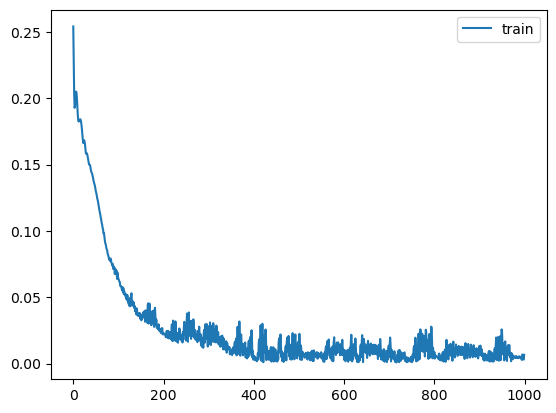

In [51]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [52]:
# make a prediction
yhatlstm = model2.predict(X_test)


1/1 [==============================] - 1s 636ms/step


In [53]:
yhatlstm.shape

(3, 1)

In [54]:

mae = mean_absolute_error(y_test,yhatlstm)
print("MSE: ", mse)
print("MAE: ", mae)

MSE:  0.2249581348759554
MAE:  0.46094377356314503


In [55]:
mae = mean_absolute_error(y_test,yhatlstm)
mse = mean_squared_error(y_test, yhatlstm)
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE", (mse)**0.5)

MSE:  0.3344549088055833
MAE:  0.46094377356314503
RMSE 0.5783207663620452


In [56]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor


In [57]:
mdl = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=6)

In [58]:
nsamples, nx, ny = X_train.shape
Xt = X_train.reshape((nsamples,nx*ny))
Xt.shape

(16, 43)

In [59]:
nsamples, nx, ny = X_test.shape
Xtst = X_test.reshape((nsamples,nx*ny))
Xtst.shape

(3, 43)

In [60]:
mdl.fit(Xt, y_train)

RandomForestRegressor(n_jobs=6, random_state=0)

In [61]:
y_pred = mdl.predict(Xtst)

In [62]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE", (mse)**0.5)

MSE:  0.10563420539653229
MAE:  0.2739961013645224
RMSE 0.3250141618399609
